In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modelos de Séries Temporais

# Modelos de Previões

Exemplo da AULA - SÉRIES TEMPORAIS - Prof. Dr. Fabiano Guasti Lima <BR>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Conjunto de observações ordenadas no tempo.

A série deve conter dados identados ao longo do tempo, ou seja, não deve haver furos ao longo do tempo. <br> 
Deve ser preenchidos com técnicas adequadas para cada caso.

# Suavização Exponencial Simples - SES

Documentação: https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

Usado para séries mais estacionárias. <br>
Séries que não apresentam tendência nem sazonalidade.

O modelo dá pesos (alpha) maiores para informações mais recentes. <br> 
O alpha escolhido é aquele que dará a menor medida de erro para o modelo.

In [4]:
#Criando o DataFrame

# criar o índice de datas trimestrais
datas = pd.date_range('2019-01', periods=15, freq='M')

valores = [3,5,9,20,12,17,22,23,51,41,56,75,60,75,88]

# criar a série temporal com dados trimestrais
serie_temporal = pd.Series(valores, index=datas)

<Axes: >

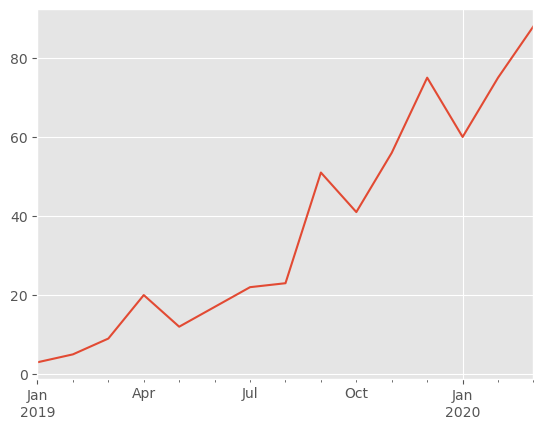

In [5]:
plt.style.use('ggplot')
serie_temporal.plot()

In [6]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Cria modelo
modelo_ses = SimpleExpSmoothing(serie_temporal).fit()


# Faz as previsões para 3 passos à frente

previsao = modelo_ses.forecast(steps=3)

In [7]:
previsao

2020-04-30    85.641113
2020-05-31    85.641113
2020-06-30    85.641113
Freq: M, dtype: float64

In [8]:
modelo_ses.summary()

Dep. Variable:,None,No. Observations:,15
Model:,SimpleExpSmoothing,SSE,2266.239
Optimized:,True,AIC,79.267
Trend:,None,BIC,80.684
Seasonal:,None,AICC,83.267
Seasonal Periods:,None,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8433951,alpha,True
initial_level,3.4491518,l.0,True


***Alpha do modelo foi de 0.8434***, ou seja, as observações recentes tiveram um peso de 84,34%

In [9]:
# Todos os valores estimados
modelo_ses.fittedvalues

2019-01-31     3.449152
2019-02-28     3.070339
2019-03-31     4.697806
2019-04-30     8.326255
2019-05-31    18.171835
2019-06-30    12.966539
2019-07-31    16.368340
2019-08-31    21.118055
2019-09-30    22.705278
2019-10-31    46.568909
2019-11-30    41.872118
2019-12-31    53.787505
2020-01-31    71.678020
2020-02-29    61.828835
2020-03-31    72.937331
Freq: M, dtype: float64

## Gráfico com a previsão e intervalos de confiança

In [10]:
# Função calcula Intervalo de Confiânça

def ets_forecast(model, h=8):
    # Simulate predictions.
    n_steps_prediction =h 
    n_repetitions = 1000
    
    yhat = model.forecast(h)
    df_simul = model.simulate(
        nsimulations=n_steps_prediction,
        repetitions=n_repetitions,
        anchor='end',
    )
    
    # Calculate confidence intervals.
    upper_ci = df_simul.quantile(q=0.975, axis='columns')
    lower_ci = df_simul.quantile(q=0.025, axis='columns')
    plt.plot(yhat.index, yhat.values)
    plt.fill_between(yhat.index, (lower_ci), (upper_ci), color='blue', alpha=0.1)
    return yhat

2020-04-30    85.641113
2020-05-31    85.641113
2020-06-30    85.641113
Freq: M, dtype: float64

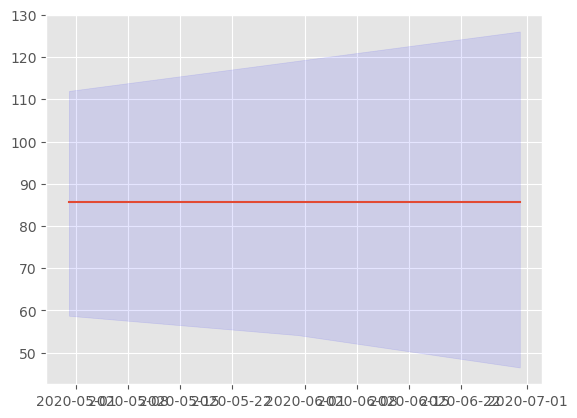

In [11]:
ets_forecast(modelo_ses, 3)

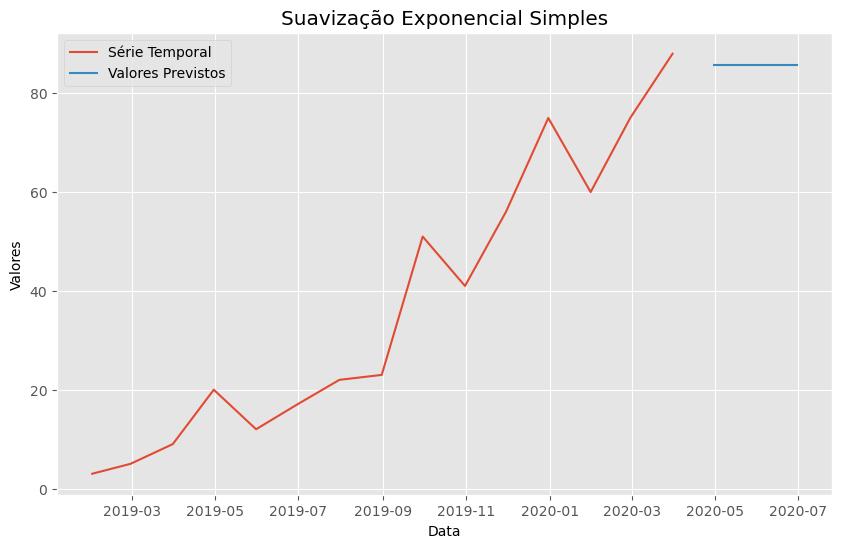

In [12]:
# obter os valores previstos e o intervalo de confiança
previstos = modelo_ses.forecast(steps=3)

# plotar o gráfico da série temporal e dos valores previstos com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal, label='Série Temporal')
plt.plot(previstos.index, previstos, label='Valores Previstos')
#plt.fill_between(intervalo_conf.index, intervalo_conf.iloc[:, 0], intervalo_conf.iloc[:, 1],
#                 alpha=0.2, color='gray', label='Intervalo de Confiança (95%)')
plt.legend(loc='best')
plt.title('Suavização Exponencial Simples')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

## Modelo Suavização Exponencial de Holt

Usado em séries com tendência mas sem sazonalidade.

Estima dois parâmetros:

- Alpha: peso para as informações mais recentes;
- Beta: coeficiente para tednência

O modelo de Holt cria uma tendência infinita.

Existe um Modelo de Holt com tendência amortecida (damped)

In [13]:
#Criando o DataFrame

# criar o índice de datas trimestrais
datas = pd.date_range('2019Q1', periods=16, freq='Q')

valores = [10,14,8,25,16,22,14,35,15,27,18,40,28,40,25,65]

# criar a série temporal com dados trimestrais
serie_temporal = pd.Series(valores, index=datas)

<Axes: >

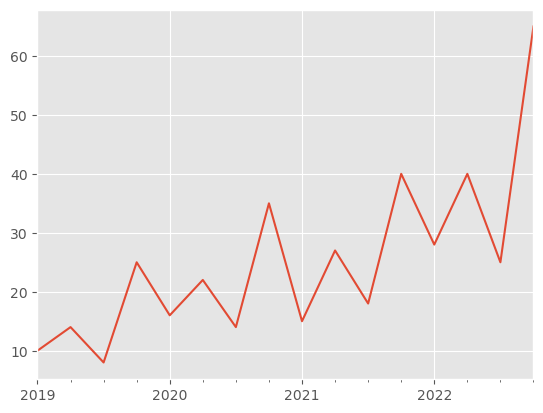

In [14]:
serie_temporal.plot()

In [15]:
from statsmodels.tsa.api import Holt

# Cria modelo
modelo_holt = Holt(serie_temporal).fit()


# Faz as previsões para 3 passos à frente

previsao = modelo_holt.forecast(steps=3)

In [16]:
previsao

2023-03-31    44.049998
2023-06-30    46.276468
2023-09-30    48.502938
Freq: Q-DEC, dtype: float64

In [17]:
modelo_holt.summary()

Dep. Variable:,None,No. Observations:,16
Model:,Holt,SSE,1472.312
Optimized:,True,AIC,80.352
Trend:,Additive,BIC,83.442
Seasonal:,None,AICC,89.685
Seasonal Periods:,None,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,1.4864e-08,beta,True


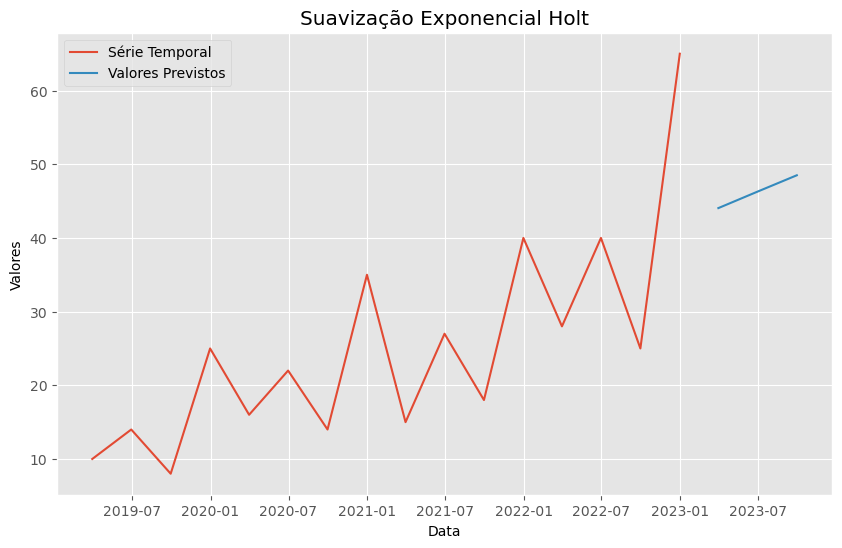

In [18]:
# obter os valores previstos e o intervalo de confiança
previstos = modelo_holt.forecast(steps=3)

# plotar o gráfico da série temporal e dos valores previstos com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal, label='Série Temporal')
plt.plot(previstos.index, previstos, label='Valores Previstos')
#plt.fill_between(intervalo_conf.index, intervalo_conf.iloc[:, 0], intervalo_conf.iloc[:, 1],
#                 alpha=0.2, color='gray', label='Intervalo de Confiança (95%)')
plt.legend(loc='best')
plt.title('Suavização Exponencial Holt')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

In [19]:
# Modelo de Holt Amortecido
modelo_holt_amort = Holt(serie_temporal, damped_trend=0.9).fit()

modelo_holt_amort.summary()

Dep. Variable:,None,No. Observations:,16
Model:,Holt,SSE,1482.332
Optimized:,True,AIC,82.461
Trend:,Additive,BIC,86.323
Seasonal:,None,AICC,96.461
Seasonal Periods:,None,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,2.7436e-08,alpha,True
smoothing_trend,1.958e-08,beta,True


In [20]:
# Faz as previsões para 3 passos à frente
previsao = modelo_holt_amort.forecast(steps=3)
previsao

2023-03-31    43.711624
2023-06-30    45.833100
2023-09-30    47.943968
Freq: Q-DEC, dtype: float64

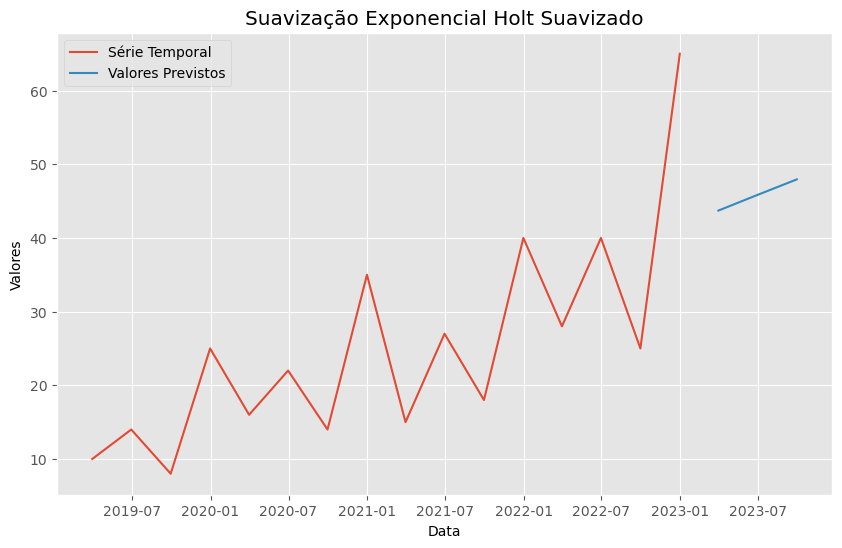

In [21]:
# obter os valores previstos e o intervalo de confiança
previstos = modelo_holt_amort.forecast(steps=3)

# plotar o gráfico da série temporal e dos valores previstos com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal, label='Série Temporal')
plt.plot(previstos.index, previstos, label='Valores Previstos')
#plt.fill_between(intervalo_conf.index, intervalo_conf.iloc[:, 0], intervalo_conf.iloc[:, 1],
#                 alpha=0.2, color='gray', label='Intervalo de Confiança (95%)')
plt.legend(loc='best')
plt.title('Suavização Exponencial Holt Suavizado')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

# Modelo Suavização Exponencial de Holt-Winters

Usado para séries com tendência e sazonalidade

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing

modelo_holt_winters = ExponentialSmoothing(serie_temporal, 
                                           seasonal_periods=4, #Sazonalidade trimestral
                                           trend='add', # Tendência Aditiva
                                           seasonal='add').fit() # Sazonal Aditiva
                                            
modelo_holt_winters.summary()

Dep. Variable:,None,No. Observations:,16
Model:,ExponentialSmoothing,SSE,351.415
Optimized:,True,AIC,65.430
Trend:,Additive,BIC,71.611
Seasonal:,Additive,AICC,109.430
Seasonal Periods:,4,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4028408,alpha,True
smoothing_trend,0.4028408,beta,True


In [23]:
# Faz as previsões para 3 passos à frente
previsao = modelo_holt_winters.forecast(steps=3)
previsao

2023-03-31    44.060068
2023-06-30    55.263141
2023-09-30    48.245255
Freq: Q-DEC, dtype: float64

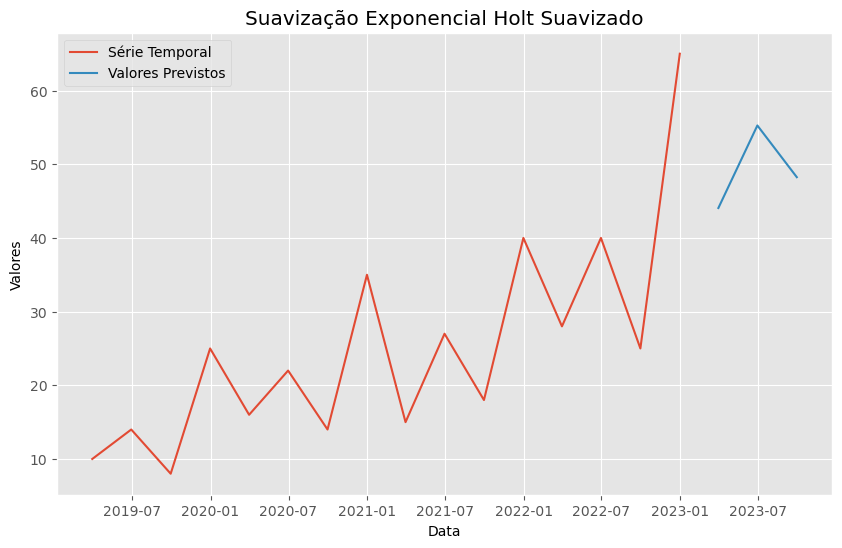

In [24]:
# obter os valores previstos e o intervalo de confiança
previstos = modelo_holt_winters.forecast(steps=3)

# plotar o gráfico da série temporal e dos valores previstos com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal, label='Série Temporal')
plt.plot(previstos.index, previstos, label='Valores Previstos')
#plt.fill_between(intervalo_conf.index, intervalo_conf.iloc[:, 0], intervalo_conf.iloc[:, 1],
#                 alpha=0.2, color='gray', label='Intervalo de Confiança (95%)')
plt.legend(loc='best')
plt.title('Suavização Exponencial Holt Suavizado')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

### Multiplicativo

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing

modelo_holt_winters_mult = ExponentialSmoothing(serie_temporal, 
                                           seasonal_periods=4, #Sazonalidade trimestral
                                           trend='mul', # Tendência Aditiva
                                           seasonal='mul').fit() # Sazonal Aditiva
                                            
modelo_holt_winters_mult.summary()

Dep. Variable:,None,No. Observations:,16
Model:,ExponentialSmoothing,SSE,72.450
Optimized:,True,AIC,40.165
Trend:,Multiplicative,BIC,46.346
Seasonal:,Multiplicative,AICC,84.165
Seasonal Periods:,4,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,1.2095e-09,beta,True


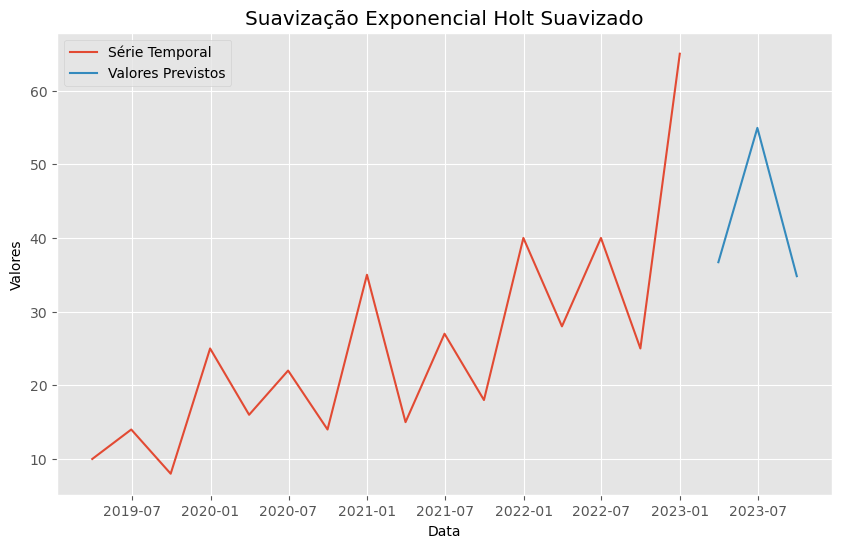

In [26]:
# obter os valores previstos e o intervalo de confiança
previstos = modelo_holt_winters_mult.forecast(steps=3)

# plotar o gráfico da série temporal e dos valores previstos com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal, label='Série Temporal')
plt.plot(previstos.index, previstos, label='Valores Previstos')
#plt.fill_between(intervalo_conf.index, intervalo_conf.iloc[:, 0], intervalo_conf.iloc[:, 1],
#                 alpha=0.2, color='gray', label='Intervalo de Confiança (95%)')
plt.legend(loc='best')
plt.title('Suavização Exponencial Holt Suavizado')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

# Comparando os Modelos de Previsão

In [27]:
# Importando a Base ambev

ambev = pd.read_excel(r'bases\ambev.xlsx')
ambev = ambev.set_index('Data')
ambev = ambev.iloc[:,:1]
ambev

,receita_ac
Data,
2000-03-31,877498
2000-06-30,1690009
2000-09-30,3522524
2000-12-31,5250345
2001-03-31,1515505
...,...
2021-12-31,72854344
2022-03-31,18439152
2022-06-30,36428147


<Axes: xlabel='Data'>

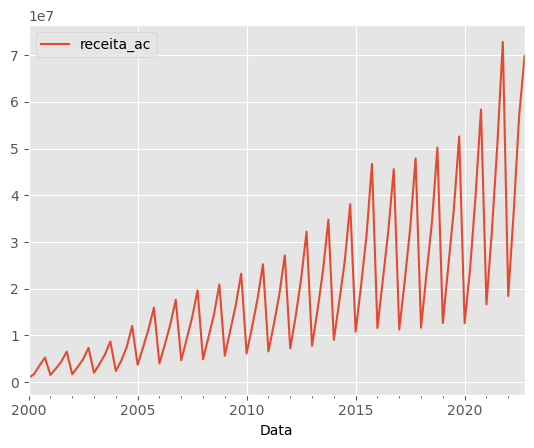

In [28]:
ambev.plot()

## Separando Base Treino e Teste

In [29]:
train_ambev = ambev['2000Q1':'2020Q4']
teste_ambev = ambev['2021Q1':'2023Q1']

<Axes: xlabel='Data'>

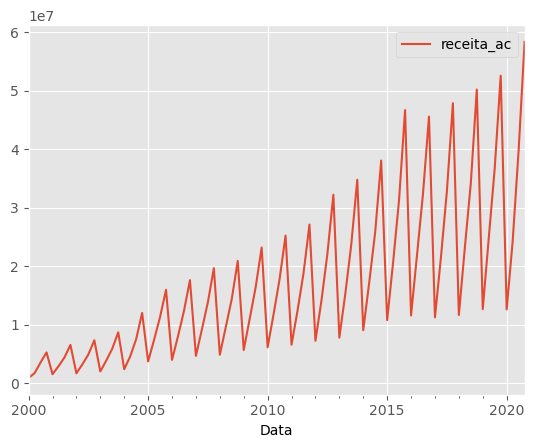

In [30]:
train_ambev.plot()

<Axes: xlabel='Data'>

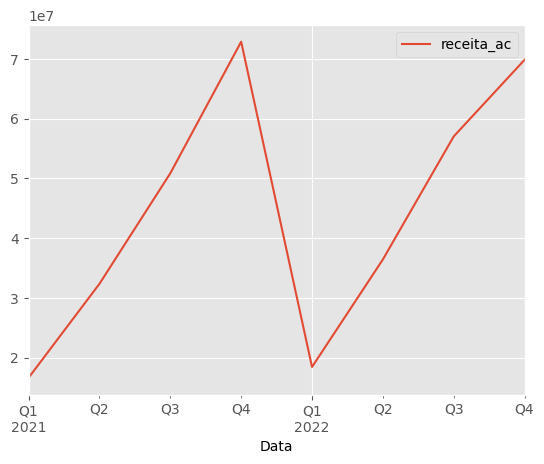

In [31]:
teste_ambev.plot()

## Previsão Suavização Simples

Usar método MAPE de avaliação do modelo

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Cria modelo
ses_ambev = SimpleExpSmoothing(train_ambev).fit()


# Faz as previsões para 3 passos à frente
ses_previsao = ses_ambev.forecast(steps=8)
ses_previsao = pd.DataFrame(ses_previsao, columns=['y_hat'])
ses_previsao

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,y_hat
2021-03-31,3.476746e+07
2021-06-30,3.476746e+07
2021-09-30,3.476746e+07
2021-12-31,3.476746e+07
2022-03-31,3.476746e+07
2022-06-30,3.476746e+07
2022-09-30,3.476746e+07
2022-12-31,3.476746e+07


In [33]:
ses_ambev.summary()

Dep. Variable:,receita_ac,No. Observations:,84
Model:,SimpleExpSmoothing,SSE,8451794642369691.000
Optimized:,True,AIC,2712.356
Trend:,None,BIC,2717.218
Seasonal:,None,AICC,2712.863
Seasonal Periods:,None,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1546512,alpha,True
initial_level,8.775e+05,l.0,True


In [34]:
def func_erros(previsao, base):

    # calcular as estatísticas de erro
    mae = np.mean(np.abs(previsao['y_hat'] - base.receita_ac))
    mse = np.mean((previsao['y_hat'] - teste_ambev['receita_ac'])**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((base['receita_ac'] - previsao['y_hat']) / base['receita_ac'])) * 100

    return print('MAE:', mae), print('MSE:', mse), print('RMSE:', rmse), print('MAPE:', mape)

In [35]:
# calcular as estatísticas de erro
mae = np.mean(np.abs(ses_previsao['y_hat'] - teste_ambev.receita_ac))
mse = np.mean((ses_previsao['y_hat'] - teste_ambev['receita_ac'])**2)
rmse = np.sqrt(mse)
mape_ses = np.mean(np.abs((teste_ambev['receita_ac'] - ses_previsao['y_hat']) / teste_ambev['receita_ac'])) * 100

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_ses)

MAE: 18751196.95187511
MSE: 504677676462922.1
RMSE: 22465032.30496057
MAPE: 47.83179187705486


## Previsão Suavização de Holt

Usar método MAPE de avaliação do modelo

In [36]:
from statsmodels.tsa.api import Holt

# Cria modelo
holt_ambev = Holt(train_ambev).fit()


# Faz as previsões para 3 passos à frente
holt_previsao = holt_ambev.forecast(steps=8)
holt_previsao = pd.DataFrame(holt_previsao, columns=['y_hat'])
holt_previsao

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,y_hat
2021-03-31,3.620326e+07
2021-06-30,3.678656e+07
2021-09-30,3.736987e+07
2021-12-31,3.795317e+07
2022-03-31,3.853648e+07
2022-06-30,3.911978e+07
2022-09-30,3.970308e+07
2022-12-31,4.028639e+07


In [37]:
holt_ambev.summary()

Dep. Variable:,receita_ac,No. Observations:,84
Model:,Holt,SSE,7661371618042331.000
Optimized:,True,AIC,2708.109
Trend:,Additive,BIC,2717.832
Seasonal:,None,AICC,2709.200
Seasonal Periods:,None,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0757143,beta,True


In [38]:
# calcular as estatísticas de erro
mae = np.mean(np.abs(holt_previsao['y_hat'] - teste_ambev.receita_ac))
mse = np.mean((holt_previsao['y_hat'] - teste_ambev['receita_ac'])**2)
rmse = np.sqrt(mse)
mape_holt = np.mean(np.abs((teste_ambev['receita_ac'] - holt_previsao['y_hat']) / teste_ambev['receita_ac'])) * 100

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_holt)

MAE: 17752721.92613724
MSE: 423235974424804.75
RMSE: 20572699.735931713
MAPE: 49.34297691023922


***MAPE PIOR DO QUE O DE SUAVIZAÇÃO SIMPLES***

## Previsão Suavização de Holt-Winters - ADITIVO

Documentação: https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

Usar método MAPE de avaliação do modelo

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing

holt_winters_ambev = ExponentialSmoothing(train_ambev, 
                                           seasonal_periods=4, #Sazonalidade trimestral
                                           trend='add', # Tendência Aditiva
                                           seasonal='add').fit() # Sazonal Aditiva
                                            

    
# Faz as previsões para 3 passos à frente
holt_winters_previsao = holt_winters_ambev.forecast(steps=8)
holt_winters_previsao = pd.DataFrame(holt_winters_previsao, columns=['y_hat'])
holt_winters_previsao

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,y_hat
2021-03-31,1.483866e+07
2021-06-30,2.683595e+07
2021-09-30,4.225103e+07
2021-12-31,5.635542e+07
2022-03-31,1.667554e+07
2022-06-30,2.867283e+07
2022-09-30,4.408791e+07
2022-12-31,5.819230e+07


In [40]:
holt_winters_ambev.summary()

Dep. Variable:,receita_ac,No. Observations:,84
Model:,ExponentialSmoothing,SSE,180828731337769.062
Optimized:,True,AIC,2401.411
Trend:,Additive,BIC,2420.858
Seasonal:,Additive,AICC,2404.425
Seasonal Periods:,4,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1464286,alpha,True
smoothing_trend,0.1064935,beta,True


In [41]:
# calcular as estatísticas de erro
mae = np.mean(np.abs(holt_winters_previsao['y_hat'] - teste_ambev.receita_ac))
mse = np.mean((holt_winters_previsao['y_hat'] - teste_ambev['receita_ac'])**2)
rmse = np.sqrt(mse)
mape_hw = np.mean(np.abs((teste_ambev['receita_ac'] - holt_winters_previsao['y_hat']) / teste_ambev['receita_ac'])) * 100

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_hw)

MAE: 8311810.154549443
MSE: 93197975081183.39
RMSE: 9653909.833905814
MAPE: 17.201812732890875


***MAPE MELHOR DO QUE O DE HOLT***

## Previsão Suavização de Holt-Winters - MULTIPLICATIVO

Usar método MAPE de avaliação do modelo

In [42]:
holt_winters_mult_ambev = ExponentialSmoothing(train_ambev, 
                                           seasonal_periods=4, #Sazonalidade trimestral
                                           trend='mul', # Tendência Aditiva
                                           seasonal='mul').fit() # Sazonal Aditiva
                                            

    
# Faz as previsões para 3 passos à frente
holt_winters_mult_previsao = holt_winters_mult_ambev.forecast(steps=8)
holt_winters_mult_previsao = pd.DataFrame(holt_winters_mult_previsao, columns=['y_hat'])
holt_winters_mult_previsao

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,y_hat
2021-03-31,1.495811e+07
2021-06-30,2.906102e+07
2021-09-30,4.398099e+07
2021-12-31,6.336185e+07
2022-03-31,1.625666e+07
2022-06-30,3.158387e+07
2022-09-30,4.779907e+07
2022-12-31,6.886244e+07


In [43]:
holt_winters_mult_ambev.summary()

Dep. Variable:,receita_ac,No. Observations:,84
Model:,ExponentialSmoothing,SSE,39619708390176.008
Optimized:,True,AIC,2273.881
Trend:,Multiplicative,BIC,2293.327
Seasonal:,Multiplicative,AICC,2276.894
Seasonal Periods:,4,Date:,"Sat, 13 May 2023"
Box-Cox:,False,Time:,16:37:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242857,alpha,True
smoothing_trend,0.0684656,beta,True


In [44]:
# calcular as estatísticas de erro
mae = np.mean(np.abs(holt_winters_mult_previsao['y_hat'] - teste_ambev.receita_ac))
mse = np.mean((holt_winters_mult_previsao['y_hat'] - teste_ambev['receita_ac'])**2)
rmse = np.sqrt(mse)
mape_hw_mul = np.mean(np.abs((teste_ambev['receita_ac'] - holt_winters_mult_previsao['y_hat']) / teste_ambev['receita_ac'])) * 100

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_hw_mul)

MAE: 4817514.500293972
MSE: 33121507533731.004
RMSE: 5755128.802531791
MAPE: 11.186378934452435


***MELHOR MAPE DE TODOS OS MODELOS***

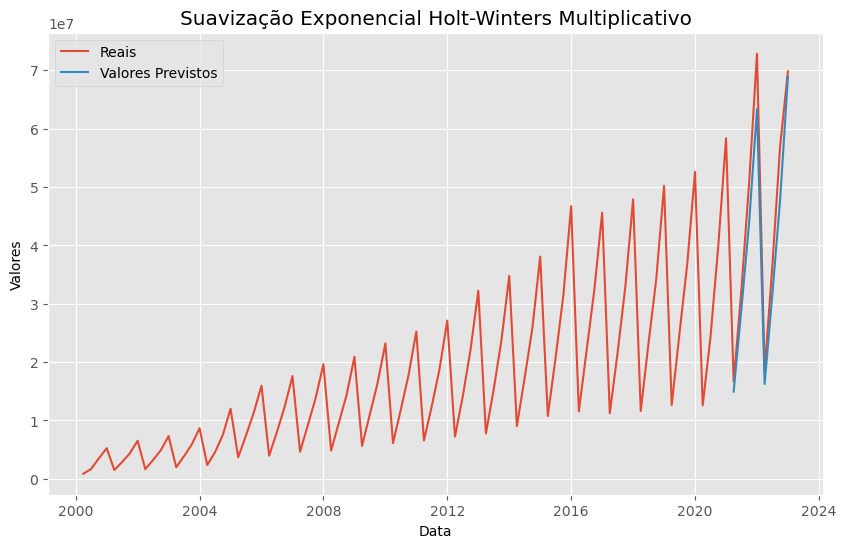

In [45]:

# plotar o gráfico da série temporal e dos valores previstos com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(ambev.index, ambev, label='Reais')
plt.plot(holt_winters_mult_previsao.index, holt_winters_mult_previsao, label='Valores Previstos')
#plt.fill_between(intervalo_conf.index, intervalo_conf.iloc[:, 0], intervalo_conf.iloc[:, 1],
#                 alpha=0.2, color='gray', label='Intervalo de Confiança (95%)')
plt.legend(loc='best')
plt.title('Suavização Exponencial Holt-Winters Multiplicativo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

## Gráfico Comparativo dos MAPEs dos Modelos de Suavização Exponencial

Mean Absolute Percentage Error

Text(0.5, 1.0, 'Comparação do MAPE')

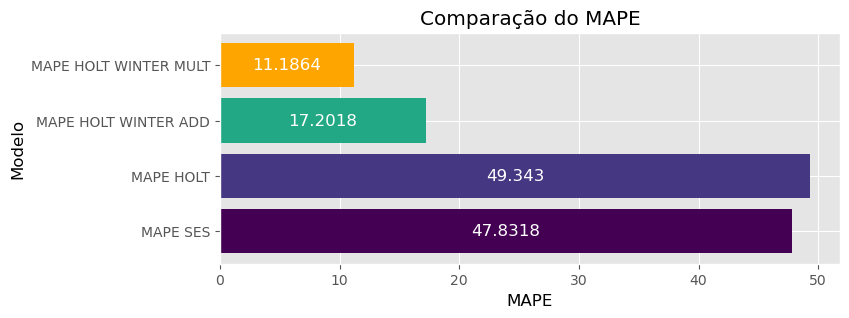

In [46]:
#Definição do dataframe com os modelos e respectivos LL
df_mape = pd.DataFrame({'modelo':['MAPE SES',
                                 'MAPE HOLT', 
                                 'MAPE HOLT WINTER ADD', 
                                 'MAPE HOLT WINTER MULT'],
                      'mape':[mape_ses, 
                            mape_holt, 
                            mape_hw, 
                            mape_hw_mul]})
df_mape

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_mape.modelo, df_mape.mape, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("MAPE", fontsize=12)
plt.title('Comparação do MAPE')

# Análise dos Erros

Uma boa previsão não deve ter resíduos correlacionados, ficando informação que não foi captada no modelo.

Deve possuir Média zero e variância constante.

<Axes: xlabel='Data'>

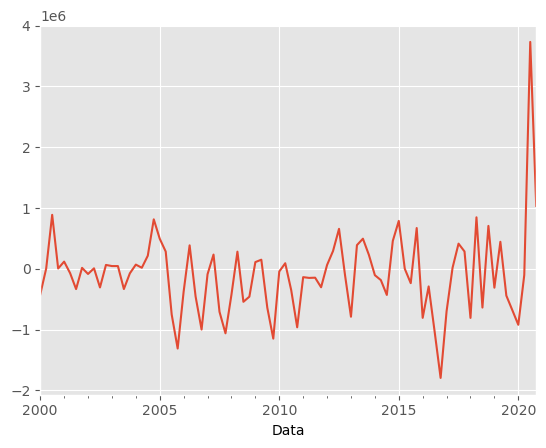

In [52]:
holt_winters_mult_ambev.resid.plot()

### Análise Autocorrelação ACF1

As pernas devem ficar dentro do intervalo de confiânça

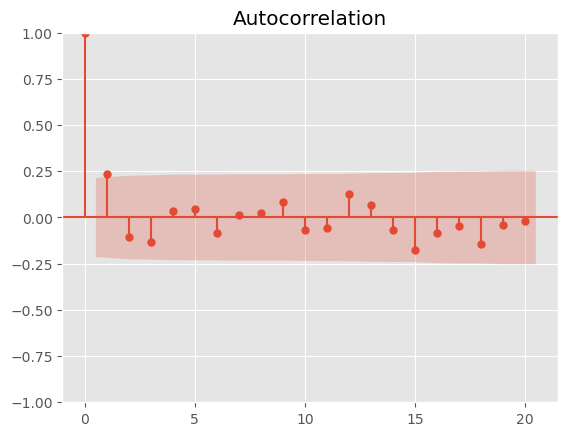

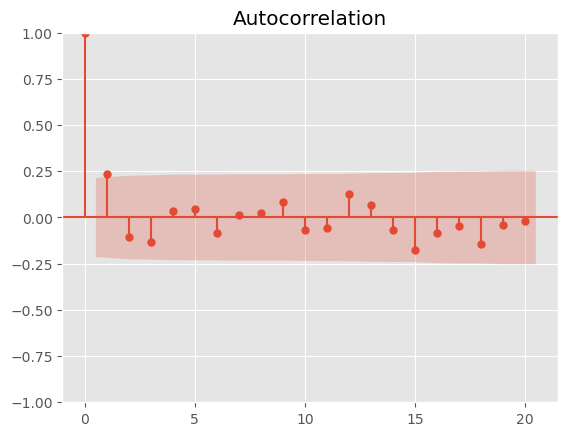

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(holt_winters_mult_ambev.resid)

### Teste de Ljung-Box

O teste de Ljung-Box é um teste estatístico que pode ser usado para avaliar a presença de autocorrelação nos resíduos de uma série temporal. <br>
Ele é usado para verificar se as autocorrelações nos resíduos são significativamente diferentes de zero para um determinado número de defasagens.


> **H0: Os resíduos são idd (modelo não exibe falhas de ajustes)<br>**

> H1: Os resíduos não são idd (modelo exibe falhas de ajustes)

p-valor > 0.05 não rejeita H0 (modelo não possui falhas de ajustes)

In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(holt_winters_mult_ambev.resid, lags=1)

In [55]:
ljung_box_test

,lb_stat,lb_pvalue
1,4.899745,0.026861
